<a href="https://colab.research.google.com/github/KuzmenkoO/amazinum_home_work/blob/main/HW_lesson_5_knn_and_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**№1 iris dataset**

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

np.random.seed(2021)

iris = load_iris()
print ('data contains:', iris.keys())

X, y = iris.data, iris.target
labels, feature_names = iris.target_names, iris['feature_names']

df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['label'] = y

features_dict = {k: v for k, v in enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])

# Розділяємо дані на train і test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Масштабуємо
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Пошук найкращого k (від 1 до 20)
k_best = None
score_best = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print('k = {} , score = {}'.format(k, score))
    if score > score_best:
        score_best = score
        k_best = k

# Результат
print('\nThe best k = {} , score = {}'.format(k_best, score_best))


data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
k = 1 , score = 0.9210526315789473
k = 2 , score = 0.9473684210526315
k = 3 , score = 0.9736842105263158
k = 4 , score = 0.9736842105263158
k = 5 , score = 0.9736842105263158
k = 6 , score = 0.9736842105263158
k = 7 , score = 0.9736842105263158
k = 8 , score = 0.9736842105263158
k = 9 , score = 0.9736842105263158
k = 10 , score = 0.9736842105263158
k = 11 , score = 0.9736842105263158
k = 12 , score = 0.9736842105263158
k = 13 , score = 0.9736842105263158
k = 14 , score = 0.9736842105263158
k = 15 , score = 0.9736842105263158
k = 16 , score = 0.9736842105263158
k = 17 , score = 0.9736842105263158
k = 18 , score = 0.9736842105263158
k = 19 , score = 0.9210526315789473
k = 20 , score = 0.9473684210526315

The best k = 3 , score = 0.9736842105263158


**№2 Synthetic dataset**

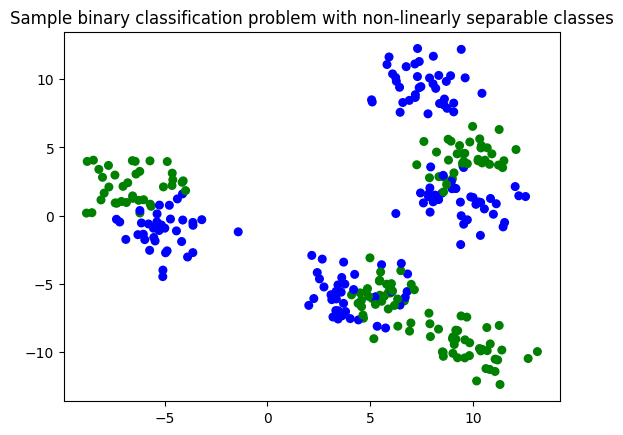

In [6]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed(2021)
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)
plt.show()

k = 1 , score = 0.9333333333333333
k = 2 , score = 0.88
k = 3 , score = 0.8933333333333333
k = 4 , score = 0.8666666666666667
k = 5 , score = 0.9066666666666666
k = 6 , score = 0.8933333333333333
k = 7 , score = 0.9333333333333333
k = 8 , score = 0.9066666666666666
k = 9 , score = 0.92
k = 10 , score = 0.92
k = 11 , score = 0.9066666666666666
k = 12 , score = 0.9066666666666666
k = 13 , score = 0.9066666666666666
k = 14 , score = 0.9333333333333333
k = 15 , score = 0.92
k = 16 , score = 0.9333333333333333
k = 17 , score = 0.92
k = 18 , score = 0.9333333333333333
k = 19 , score = 0.92
k = 20 , score = 0.9333333333333333
The best k = 1 , score = 0.9333333333333333


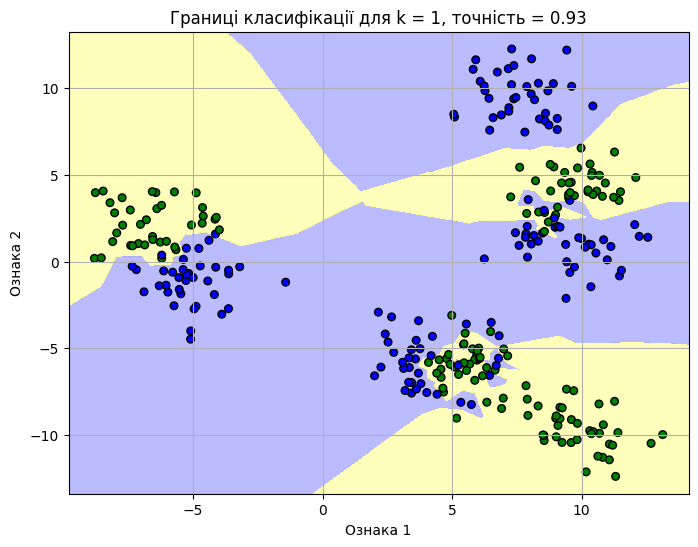

In [8]:
# Розділяємо дані на train і test
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

# Масштабуємо
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Пошук найкращого k (від 1 до 20)
k_best = None
score_best = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print('k = {} , score = {}'.format(k, score))
    if score > score_best:
        score_best = score
        k_best = k

# Результат
print('The best k = {} , score = {}'.format(k_best, score_best))

# visualize decision boundary

model = KNeighborsClassifier(n_neighbors=k_best)
model.fit(X_train, y_train)

h = 0.02
x_min, x_max = X_D2[:, 0].min() - 1, X_D2[:, 0].max() + 1
y_min, y_max = X_D2[:, 1].min() - 1, X_D2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])

Z = model.predict(grid_scaled)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#AAAAFF', '#FFFFAA'])

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
plt.scatter(X_D2[:, 0], X_D2[:, 1], c=y_D2, cmap=cmap_bold, edgecolor='k', s=30)
plt.title(f'Границі класифікації для k = {k_best}, точність = {score_best:.2f}')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.grid(True)
plt.show()
